<a href="https://colab.research.google.com/github/mwithgod3952/TIL/blob/main/MRR(Monthly_Recurring_Revenue).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    * ARR(Annual Recurring Revenue)는 연간 반복 매출, 연간 구독 매출을 12배로 산출하거나 연간 구독 매출로 전년도 대비 비즈니스의 성장을 측정하는 지표이다. 
    단발적인 서비스 제공 및 컨설팅을 통한 수익은 포함하지 않는다.

    * MRR(Monthly Recurring Renevue)는 월간 반복 매출, 월간 구독 형태의 서비스를 제공하는 경우 비지니스의 성장을 측정하는 기본 지표이다.
    연간 구독 서비스를 제공하고 있는 경우는 해당 금액을 12로 나누는 경우가 많다.

        : MRR은 회사의 총 연간 반목 매출(ARR)로부터 파생된 것으로, ARR을 월 단위의 값으로 정규화한 것입니다.
        : 서비스 구독자의 의사에 의한 구독 기간동안 중 구독료가 산정코자하는 총 월 또는 년 중 일정 기간 반복수익의 일부를 책정됩니다.


<font color = 'blue'><font size = 2>Additional recurring revenue metrics</font>

    * New MRR:  Revenue generated by newly added accounts. In the above examples, all three would be counted in April’s new MRR subtotal, but not in any other month.

    * Enpansion MRR: This is the revenue increase from existing accounts.

    * Curn MRR: Revenue lost from users that downgraded their subscriptions, or outright cancelled.
    
    * Net New MRR: Sum of the previous three sub-measures; alternatively, the change in MRR from month to month. This is a useful measure for assessing how much your revenue is growing, or hopefully not contracting, and is usually a more useful metric to look at than total MRR. If the churn is greater in magnitude than the new and expansion gains, then that’s a major sign for further investigation!

# <font size=4>Calculating recurring revenue</font>

<html>

<head>
    <meta charset="utf-8" />
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
</head>

<body>
    <img src="https://chartio.com/images/tutorials/saas-metrics/plans_tbl.png">
</body>

</html>
Fig1

<html>

<head>
    <meta charset="utf-8" />
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
</head>

<body>
    <img src="https://chartio.com/images/tutorials/saas-metrics/accounts_tbl.png">
</body>

</html>
Fig2

    상위의 두 테이블이 "accounts"와 "subscriptions"에 관한 가장 기본정이 데이터 형태라고 볼 수 있습니다.

        * "Plans Table(Fig1)"에서, 'period', 'amount' 오브젝트를 통해 paid pane 및 period(일종의 서비스에 대한 의존도)를 확인할 수 있습니다. 경우에 따라 고객에 따른 "추가적인 속성 값"(additional attributes) 개별적으로 추가될 수도 있습니다.
        * 새롭게 유입된 paid account가 있다면 "Accounts Table(Fig2)" plane_id와 함께 Fig2 테이블의 새로운 row값으로 기록합니다 
            + "구독형태"는 중복인 경우가 있음으로 "panes id" 케이스를 구분하며 Plans Table에서 관리됩니다.
            + 만약, 특정 계정에 대해, 구독을 정지한 상태라면 Accounts Table의 plan_id는 null값으로 처리됩니다.
        * 두 테이블을 plan_id로 연결하여 최신 정보의 The total MRR을 구합니다.

        

    1. 일별 MRC(Monthly Recurring Charge)를 계산합니다.
        : 한 예로, 1년 동안의 정보통합을 위해서는 1년 동안의 일별 MRC를 통합한 TMRC(Total sum MRC)를 계산해야 합니다.
    2. Generate the report
        : MRR은 한달동안의 TMRC의 합과 같습니다.
        : Rolling MRR은 마지막 40일 동안의 TMRC와 같습니다.

---

In [1]:
print('\n')
from google.colab import drive; drive.mount('/content/drive', force_remount=True)

import os
os.chdir('/content/drive/MyDrive/B2B_SaaS_Bussiness_Analysis')
print(f'\n\t {os.getcwd()}')



Mounted at /content/drive

	 /content/drive/MyDrive/B2B_SaaS_Bussiness_Analysis


In [ ]:
path = os.getcwd()
file_name = [x for x in os.listdir(path) if x.endswith('csv')][0]
print(f"\n\t {file_name}")


	 sample-subscription.csv


In [ ]:
import random
import numpy as np
import pandas as pd

from datetime import timedelta, date

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(f'{path}/{file_name}')
df.head(2)

,subscription_start_date,subscription_end_date,name,dmrc
0,1/26/16,1/26/17,Product Z,8.0
1,1/26/16,1/26/17,Product Z,8.0


In [ ]:
cvt_to_datetime = lambda x: pd.to_datetime(df[x], infer_datetime_format=True)
df['subscription_start_date'] = cvt_to_datetime('subscription_start_date')
df['subscription_end_date'] = cvt_to_datetime('subscription_end_date')

dt_colN_L = ['subscription_start_date', 'subscription_end_date']
if type(df[dt_colN_L[0]]) == type(df[dt_colN_L[1]]):
    print(f"\n\t - Type of column: {type(df[dt_colN_L[random.randrange(0, 2, 1)]][random.randrange(0, len(df), 1)])}")


	 - Type of column: <class 'datetime.date'>


In [ ]:
def cnt_null(x):
    return print(f"\t - Number Of Null Values in {x}: {sum(df[x].isnull())}")

print('\n')	
cnt_null('subscription_start_date')    
cnt_null('subscription_end_date')



	 - Number Of Null Values in subscription_start_date: 0
	 - Number Of Null Values in subscription_end_date: 11734


In [ ]:
df.loc[np.where(df['subscription_end_date'].isnull())[0], 'subscription_end_date'] = date(2015,12,1)
print('\n')	
cnt_null('subscription_end_date')



	 - Number Of Null Values in subscription_end_date: 0


---

## <font size=2.5>**TMRC**</font>

In [ ]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
    
daily_mrr = []
for my_date in daterange(date(2015,1,1), date(2015,12,1)):
    my_date = pd.to_datetime(my_date)
    dtDF = df[(df['subscription_end_date'] >= my_date) 
              & (df['subscription_start_date'] <= my_date) 
              & (df['subscription_start_date'].apply(lambda x: x.day) == my_date.day)]
    TMRC = dtDF['dmrc'].sum()
    daily_mrr.append(
        {'date': my_date,
         'mrc' : TMRC 
         }
         )

X = matplotlib.dates.date2num([x['date'] for x in daily_mrr])
y = [x['mrc'] for x in daily_mrr]    

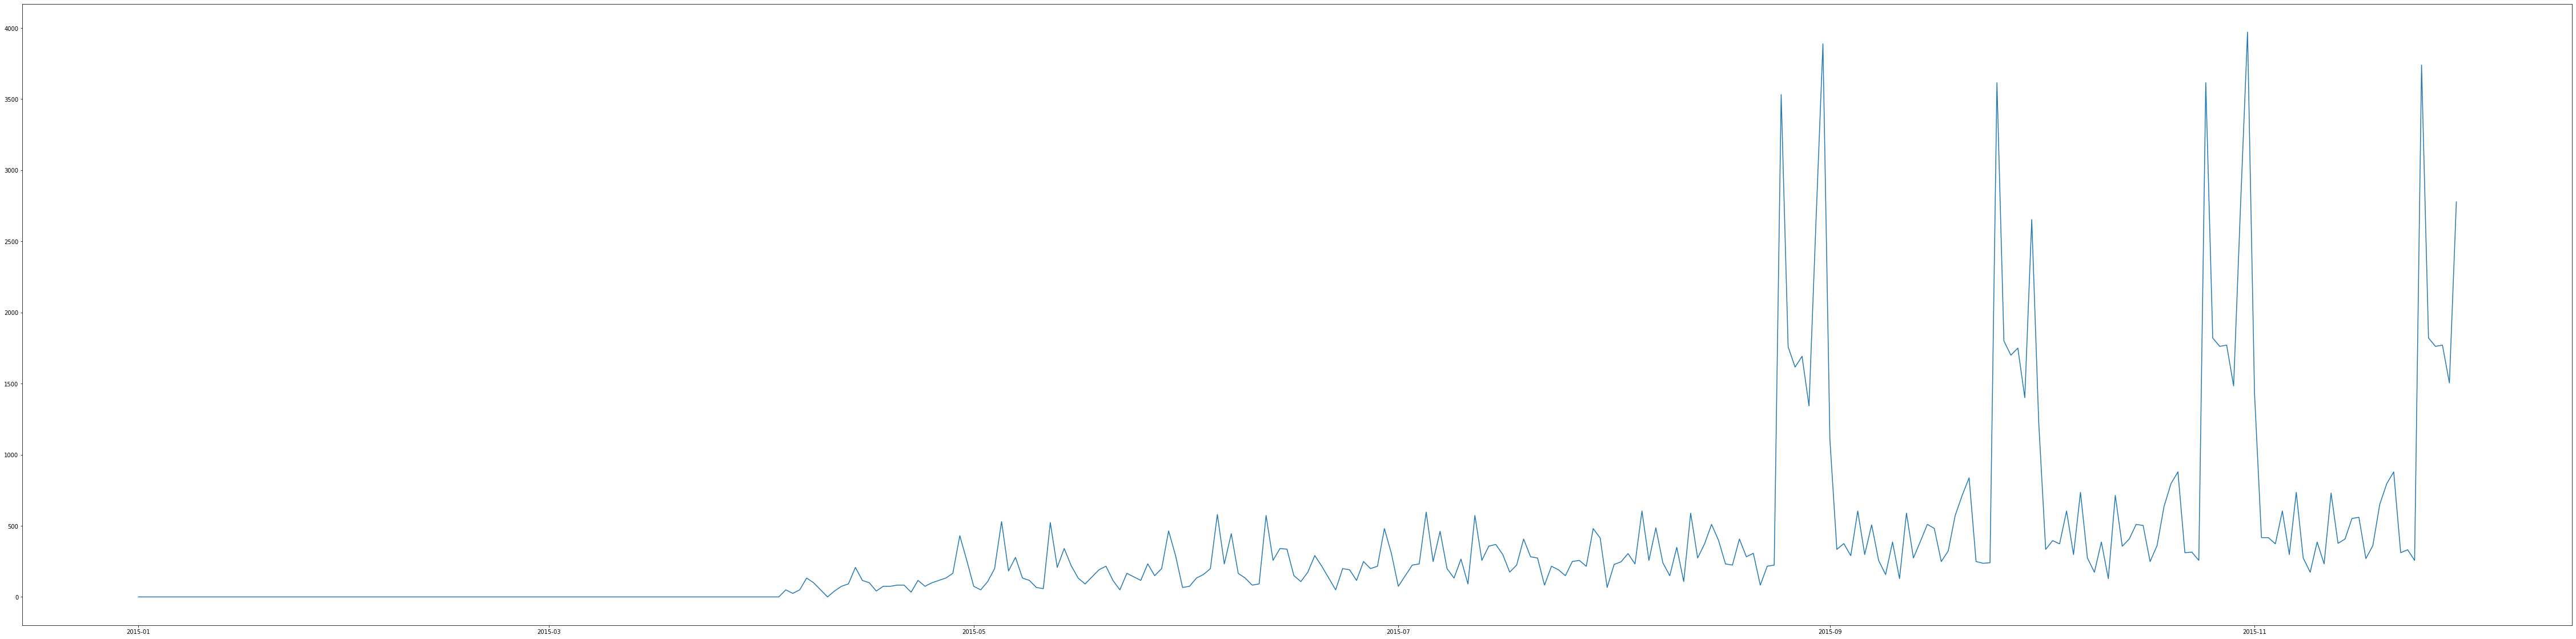

In [ ]:
plt.figure( figsize=(80, 20) )
plt.plot_date(X, y, '-')
plt.show()

## <font size=2.5>**MRR**</font>